Import Libraries

In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [4]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [5]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [6]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001E76BC4CA90>

Read an Image

In [8]:
img = cv2.imread('images.jpg')

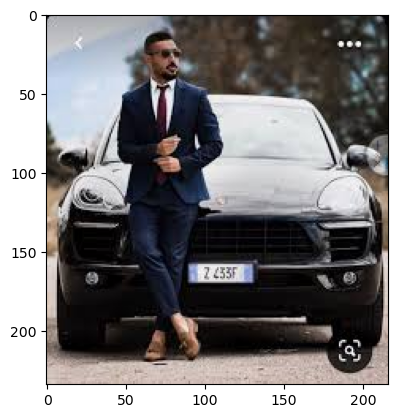

In [9]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [10]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [11]:
print(ClassIndex)

[1 3]


In [12]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness=2)

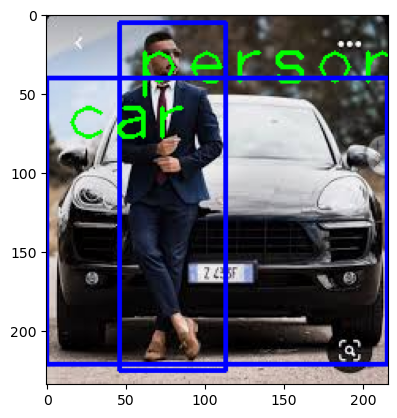

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

VIDEO DEMO

In [14]:
cap = cv2.VideoCapture("WhatsApp Video 2024-06-26 at 11.34.21 AM.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOerror("Cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness=2)

    cv2.imshow('Object Detection',frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[3 3 3 1]
[3 3 3 1]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3 1]
[3 3 3 1]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3 1]
[3 3 3]
[3 3 3 1 1]
[3 3 3 1 1]
[3 3 3 1 1]
[3 3 3 1 1]
[3 3 1 3 1]
[3 1 3 3 1 1]
[3 1 3 3 1 1]
[3 1 3 3 1 1]
[3 1 3 3 1 1]
[3 1 3 3 1 1]
[3 1 3 3 1 1]
[3 1 3 1 1 3]
[3 1 3 1 1]
[3 1 1 3 1]
[3 1 3 1]
[3 1 3 1]
[3 1 3 1]
[3 1 3 1]
[3 1 1 1 3]
[3 1 1 1 3]
[1 3 1 1 3]
[1 3 1 1 3]
[1 3 1 1]
[1 3 1 1 3]
[1 3 1 1 3]
[1 3 1 1 3]
[1 3 1 1 3]
[1 3 1 1 3]
[1 3 1 1 3]
[1 1 3 1 1]
[1 1 3 1 1]
[1 3 1 1 1]
[1 1 3 1 1]
[1 1 1 1 3]
[1 1 1 3 1]
[1 1 1 1 3 1]
[1 1 1 1 1 3 3]
[1 1 3 1 1 1 3]
[1 3 1 1 1 1]
[1 3 1 1 1 3 1]
[1 3 1 1 1 3 1]
[1 3 1 1 3 1 1]
[1 1 3 1 1 1]
[1 3 1 1 1 1 3 1]
[1 3 1 1 1 1]
[1 3 1 1 1]
[1 1 3 1 1 1 3]
[1 1 3 1 1]
[1 1 1 3]
[1 3 1 1 1]
[3 1 1 1 1]
[3 1 3 1 1 1]
[3 1 3 1 1 1 3]
[3 1 1 3 1 3]
[3 1 1 3 3 1]
[3 1 3 3 1 1]
[1 3 3 1 3 1 1]
[1 3 1 3 1 3 1 3]
[1 3 1 3 3]
[3 1 3 3 1 1]
[ 3  1  3 11]
[3 1 3 1 1 1 1]
[3 1 3 1 1 3 1 3]
[3 3 1 1 3 1]
[3 3 1 3

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
